In [1]:
import pandas as pd
import geopandas as gpd
import json
import geojson
from shapely.geometry import shape
from shapely.wkt import dumps, loads
from shapely.geometry.polygon import LineString, LinearRing, Polygon


import sys
#Move to parent folder
sys.path.insert(0, '../croprows-cli/src/')

import os
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import re

In [11]:
#../orthomosaics/cropped/mosaic_16_12_1077px_192_tiles/
linesgeojson= '../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/obj/mosaic-cl_3-rw_2_lines.geojson'
boundsgeojson= '../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/vectors/mosaic-cl_3-rw_2.geojson'
result_shp= '../orthomosaics/results/testfile3/result.shp'

#../orthomosaics/cropped/mosaic_16_12_1077px_192_tiles/vectors/mosaic-cl_0-rw_0.geojson

(378935.83917887101, 378955.83917887101)

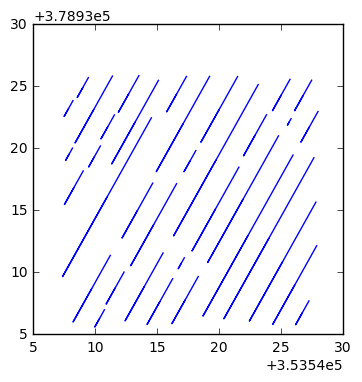

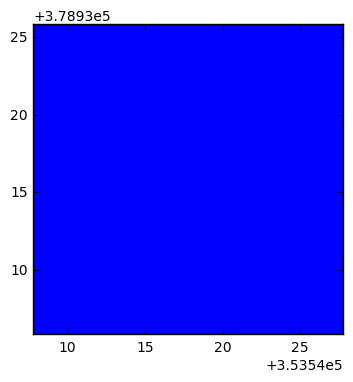

In [12]:
lineas = gpd.GeoDataFrame.from_file(linesgeojson)
boxl = gpd.GeoDataFrame.from_file(boundsgeojson)
#print(lineas)
#print(lineas.geometry.bounds)
lineas.geometry.plot()
boxl.geometry.plot()

plt.xlim([np.min(boxl.geometry.bounds.minx), np.max(boxl.geometry.bounds.maxx)])
plt.ylim([np.min(boxl.geometry.bounds.miny), np.max(boxl.geometry.bounds.maxy)])



POINT (353550.2913548229 378936.1824869813)
36
0.3433081103139557
0.3433081103139557
0.7471514623612165
1.5068926713429391
1.6209490866749547
2.689308605331462
4.831069105304778
2.4087181714130566
2.544389147660695
2.6215224199695513
4.238653962267563
8.78582027205266
7.4658331290702336
10.776389319333248
8.710146253288258
12.998983105353545
5.840568563027773
6.059039920044597
13.612482985947281
13.376832861686125
9.21993152826326
16.263032629038207
9.167175129055977
15.743137647630647
14.950849129003473
15.7016008963692
17.27992989635095
18.23313344368944
18.266661129018757
12.198967729636934
16.873635295662098
15.497540361538995
18.306963420007378
15.726233819324989
18.3121044387226
16.858832671307027
18.94466743868543


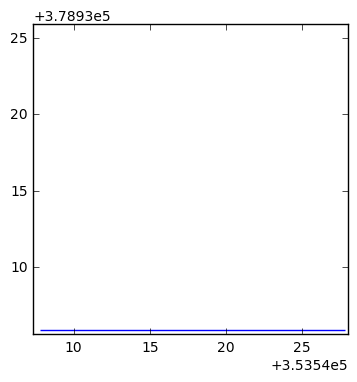

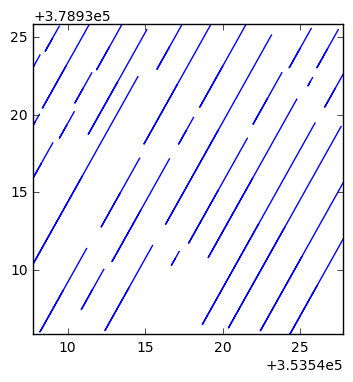

In [13]:
line1 = LineString([(np.min(boxl.geometry.bounds.minx), np.min(boxl.geometry.bounds.miny)), 
                    (np.max(boxl.geometry.bounds.maxx), np.min(boxl.geometry.bounds.miny))])


line_gdf = gpd.GeoDataFrame(geometry=[line1])
line_gdf.geometry.plot()

plt.xlim([np.min(lineas.geometry.bounds.minx), np.max(lineas.geometry.bounds.maxx)])
plt.ylim([np.min(lineas.geometry.bounds.miny), np.max(lineas.geometry.bounds.maxy)])

#print(line1)
print(lineas.geometry[0].centroid)
print(len(lineas))
print(line1.distance(lineas.geometry[0].centroid))

s =[]

for i in range(0,len(lineas)):
    distance = line1.distance(lineas.geometry[i].centroid)
    print(distance)
    if(distance > 2):
        s.append(lineas.geometry[i])
        

crs = {'init': 'epsg:32618'}
dd=gpd.GeoDataFrame(crs=crs, geometry=s)
dd.geometry.plot()
plt.xlim([np.min(boxl.geometry.bounds.minx), np.max(boxl.geometry.bounds.maxx)])
plt.ylim([np.min(boxl.geometry.bounds.miny), np.max(boxl.geometry.bounds.maxy)])


dd.to_file(driver = 'ESRI Shapefile', filename= result_shp)

In [14]:
def getExtrapoledLine(p1,p2):
    'Creates a line extrapoled in p1->p2 direction'
    EXTRAPOL_RATIO = 50
    a = (p1[0]-EXTRAPOL_RATIO*(p2[0]-p1[0]), p1[1]-EXTRAPOL_RATIO*(p2[1]-p1[1]) )#p1
    b = (p1[0]+EXTRAPOL_RATIO*(p2[0]-p1[0]), p1[1]+EXTRAPOL_RATIO*(p2[1]-p1[1]) )
    return LineString([a,b])

In [15]:
print(len(lineas.geometry))

36


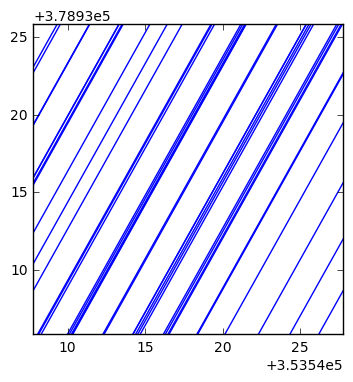

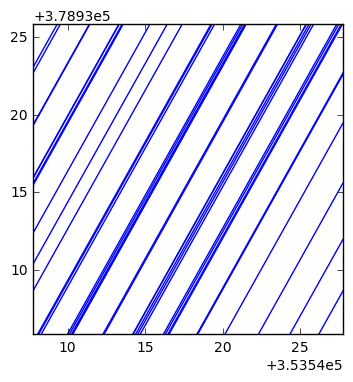

In [19]:
boxlk = gpd.GeoDataFrame.from_file(boundsgeojson)

longlines=[]
idlonglines=[]
for x in range (0 , len(lineas.geometry)):
    linea_bx= (list(lineas.geometry[x].coords))
    #box_ext = (boxl.geometry.exterior)
    long_line = getExtrapoledLine(*linea_bx[-2:])
    idlonglines.append(x)
    longlines.append(long_line)
    
#print(longlines)    
    
crs = {'init': 'epsg:32618'}

df = pd.DataFrame({'id': idlonglines})

ddkfh=gpd.GeoDataFrame(df, crs=crs, geometry=longlines)
ddkfh.geometry.plot()
plt.xlim([np.min(boxl.geometry.bounds.minx), np.max(boxl.geometry.bounds.maxx)])
plt.ylim([np.min(boxl.geometry.bounds.miny), np.max(boxl.geometry.bounds.maxy)])
ddkfh.to_file(driver = 'ESRI Shapefile', filename=  '../orthomosaics/results/testfile3/longlinesfull.shp')


cutlined=(ddkfh.intersection(boxlk.geometry.iloc[0]))

#print(cutlined)

crs = {'init': 'epsg:32618'}
ddkfk=gpd.GeoDataFrame(crs=crs, geometry=cutlined)
ddkfk.geometry.plot()
plt.xlim([np.min(boxl.geometry.bounds.minx), np.max(boxl.geometry.bounds.maxx)])
plt.ylim([np.min(boxl.geometry.bounds.miny), np.max(boxl.geometry.bounds.maxy)])
ddkfk.to_file(driver = 'ESRI Shapefile', filename=  '../orthomosaics/results/testfile3/cutter.shp')




#cutlined =  ( (ddkfh.intersection(boxlk).geometry)[1]) 
#print(cutlined)
#print((ddkfh.geometry))
#print(ddkfh.geometry[47])


#test= loads('LINESTRING (358482.770899999 376758.6409239993, 358966.634000001 376633.5761240007)')
#crs = {'init': 'epsg:32618'}
#nn=gpd.GeoDataFrame(crs=crs, geometry=[test])
#nn.geometry.plot()

#inter = nn.intersection(boxlk).geometry
#print(inter)

    

#print(ddkfh)
#print(str(boxlk.geometry))

#inter = ddkfh.intersection(boxlk).geometry
#print(inter)


#print(ddkfh.geometry.overlay(boxlk))


#print(ddkfh.intersects(boxlk))
#cutline =  ( (ddkfh.intersection(boxlk).geometry)) 
#print(cutline)

#for x in range (0 , len(longlines)):
    #print(ddkf.intersects(boxl))
#    cutlinef =  ( (ddkf.intersection(boxl))[x]) 
#    print(cutlinef)

#crs = {'init': 'epsg:32618'}
#ddkfk=gpd.GeoDataFrame(crs=crs, geometry=[cutlinef])
#ddkfk.geometry.plot()
#plt.xlim([np.min(boxl.geometry.bounds.minx), np.max(boxl.geometry.bounds.maxx)])
#plt.ylim([np.min(boxl.geometry.bounds.miny), np.max(boxl.geometry.bounds.maxy)])
#ddkfk.to_file(driver = 'ESRI Shapefile', filename=  '../../orthomosaics/cropped/mosaic_18_23_1084px_414_tiles/vectors/cutter.shp')



[(353556.945436, 378940.747949), (353556.684704, 378940.281743), (353557.206167, 378941.214155)]
****
(353556.684704, 378940.281743) (353557.206167, 378941.214155)
0    True
dtype: bool
LINESTRING (353554.200144794 378935.839178871, 353565.3853933751 378955.839178871)


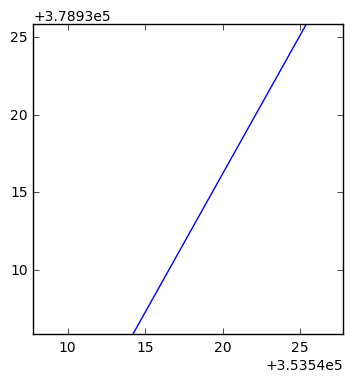

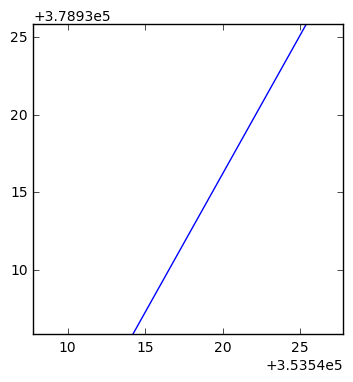

In [20]:
linea_b= (list(lineas.geometry[5].coords))
box_ext = (boxl.geometry.exterior)

print(linea_b)
print('****')
print(*linea_b[-2:])


long_line = getExtrapoledLine(*linea_b[-2:])

#print(box_ext.intersects(long_line)[0])
#print(box_ext.intersection(long_line).geometry[0])
#print(list(box_ext.intersection(long_line).geometry[0].coords))


#if box_ext.intersects(long_line)[0]:
#    intersection_points = box_ext.intersection(long_line)
#    new_point_coords = list(box_ext.intersection(long_line).geometry[0].coords)[0]
#else:
#    raise Exception("Something went really wrong")

#linea_b.append(new_point_coords)
#new_extended_line = LineString(linea_b)

#new_extended_line = LineString(l_coords) 

#print('___')
#print(new_extended_line)
#print('___')
#print(long_line)




crs = {'init': 'epsg:32618'}
ddk=gpd.GeoDataFrame(crs=crs, geometry=[long_line])
ddk.geometry.plot()
plt.xlim([np.min(boxl.geometry.bounds.minx), np.max(boxl.geometry.bounds.maxx)])
plt.ylim([np.min(boxl.geometry.bounds.miny), np.max(boxl.geometry.bounds.maxy)])


ddk.to_file(driver = 'ESRI Shapefile', filename=  '../orthomosaics/results/testfile3/test.shp')


print(ddk.intersects(boxl))
cutline =  ( (ddk.intersection(boxl).geometry)[0]) 

print(cutline)


crs = {'init': 'epsg:32618'}
ddkf=gpd.GeoDataFrame(crs=crs, geometry=[cutline])
ddkf.geometry.plot()
plt.xlim([np.min(boxl.geometry.bounds.minx), np.max(boxl.geometry.bounds.maxx)])
plt.ylim([np.min(boxl.geometry.bounds.miny), np.max(boxl.geometry.bounds.maxy)])


ddkf.to_file(driver = 'ESRI Shapefile', filename=  '../orthomosaics/results/testfile3/test2.shp')







In [21]:
#contents = open(linesgeojson).read()
#print(contents)
#features = geojson.loads(contents)

#with open(linesgeojson) as f:
#    data = json.load(f)

#lines = []
#for feature in data['features']:
#    print (feature['geometry']['type'])
#    print (feature['geometry']['coordinates'])
#    print (feature['properties']['lcount'])
#    lines.append(feature['geometry']['coordinates'])

In [22]:
#print(lines)

#x = [i for i,j in lines[0]]
#y = [j for i,j in lines[0]]

#fig = plt.figure() 
#ax = fig.gca() 
#ax = fig.gca() 
#ax.plot(x,y)
#ax.axis('scaled')

    
    


#ring = LineString((lines)) #LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
#x, y = ring.xy

#fig = plt.figure(1, figsize=(5,5), dpi=90)
#ax = fig.add_subplot(111)
#ax.plot(x, y)
#ax.set_title('Polygon Edges')

#xrange = [-1, 3]
#yrange = [-1, 3]
#ax.set_xlim(*xrange)
#ax.set_ylim(*yrange)
#ax.set_aspect(1)

   id                                           geometry
0   1  POLYGON ((358769.3503151264 376855.9995228422,...


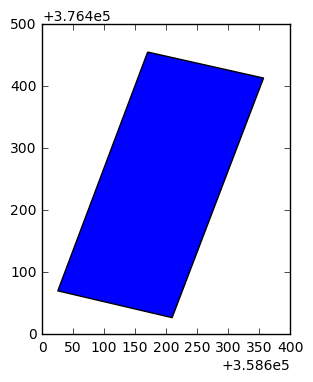

In [23]:
mask_file = "../orthomosaics/field_boundary.shp"
mask = gpd.GeoDataFrame.from_file(mask_file)
mask.geometry.plot()

print(mask)

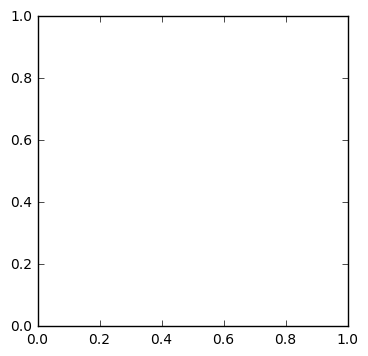

In [24]:
cutlinedk=(ddkfk.intersection(mask.geometry.iloc[0]))
ddkfky=gpd.GeoDataFrame(crs=crs, geometry=cutlinedk)
ddkfky.geometry.plot()

In [21]:
ddkfky.to_file(driver = 'ESRI Shapefile', filename=  '../orthomosaics/results/testfile3//cutterc.shp')

   id                                           geometry
0   1  POLYGON ((353580.3321288265 379050.9331194181,...


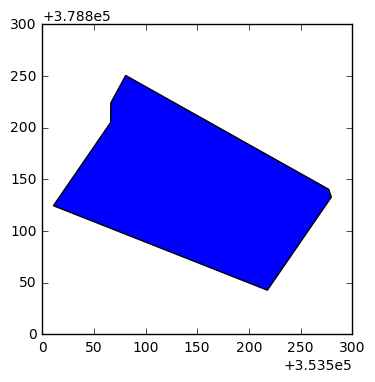

In [22]:
mask_file2 = "../orthomosaics/field_boundary2.shp"
mask2 = gpd.GeoDataFrame.from_file(mask_file2)
mask2.geometry.plot()

print(mask2)